In [1]:
from test_pipe import *

Paper trading mode enabled.
Connecting to IBKR at 127.0.0.1:7497 with client ID 1


In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
# Example usage
ib_conn = IBKRConnection(live_trading=False)
ib_conn.connect()
ib = ib_conn.get_ib()
print(f"Server time: {ib.reqCurrentTime()}")

strat = MovingAverageStrategy(conn=ib_conn, symbol='AAPL', fast_period=10, slow_period=30)
strat.run_strategy()

# ib_conn.disconnect()

Paper trading mode enabled.
Connecting to IBKR at 127.0.0.1:7497 with client ID 1
Connected to IBKR at 127.0.0.1:7497 with client ID 1
Server time: 2025-12-09 15:48:06+00:00
Strategy base class initialized. <class 'ib_insync.ib.IB'>
Moving Average Strategy initialized for AAPL (10/30 periods).
Analysis: Fast MA: 277.57, Slow MA: 280.50, Signal: SELL
Placing SELL order for AAPL.


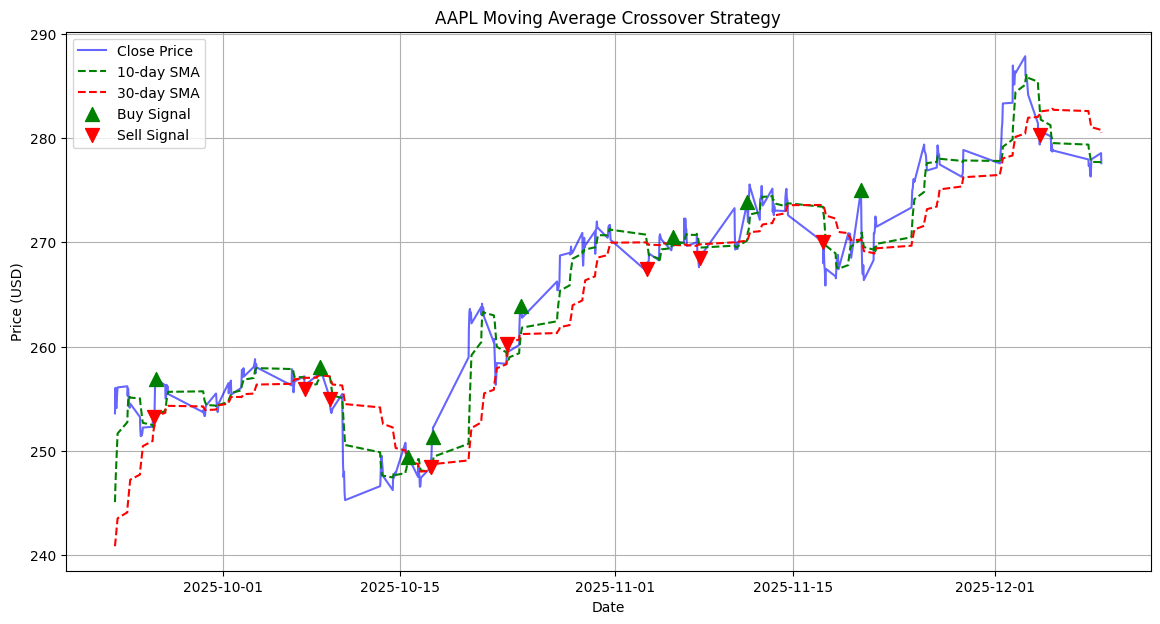

In [4]:
strat.plot_signals(strat.df)

In [5]:
strat.df.head()

,date,open,high,low,close,volume,average,barCount,SMA_10,SMA_30,Signal,Buy_Signal_Price,Sell_Signal_Price
29,2025-09-22 10:00:00-04:00,251.11,253.69,250.78,253.60,11037368.0,252.303,63045,245.091,240.859333,0,NaN,NaN
30,2025-09-22 11:00:00-04:00,253.62,256.64,253.38,256.05,15161947.0,255.078,76469,246.911,241.382333,0,NaN,NaN
31,2025-09-22 12:00:00-04:00,256.07,256.31,253.16,254.21,9615809.0,254.424,50032,248.243,241.890000,0,NaN,NaN
32,2025-09-22 13:00:00-04:00,254.21,254.94,253.52,254.11,4656936.0,254.273,26493,249.370,242.405000,0,NaN,NaN
33,2025-09-22 14:00:00-04:00,254.10,255.77,254.02,255.40,4687310.0,255.105,25875,250.581,242.947000,0,NaN,NaN


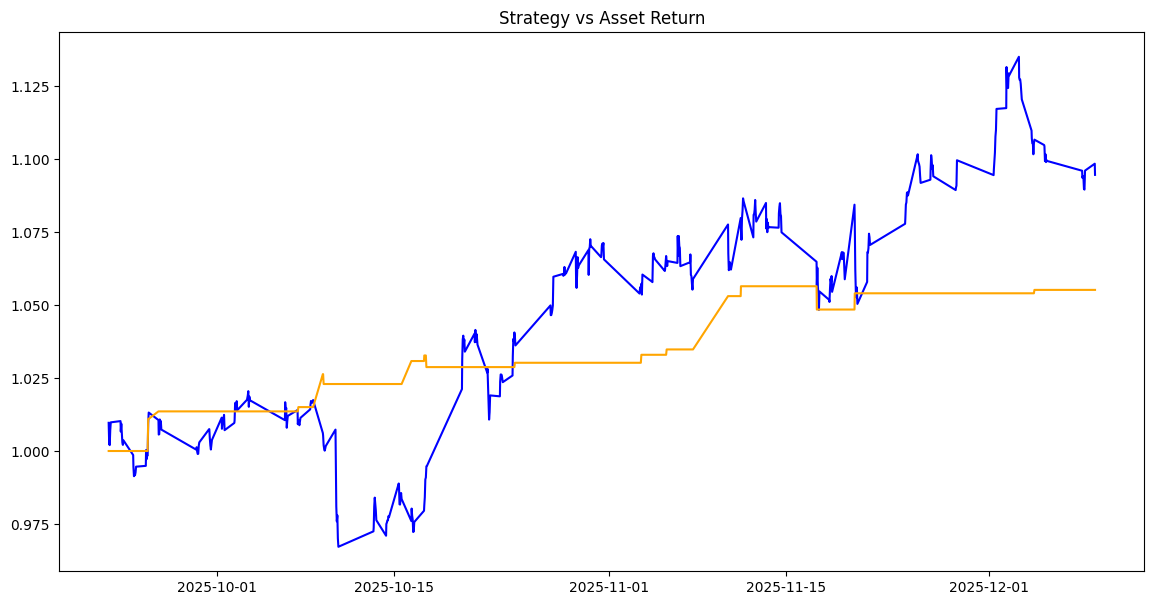

In [6]:
df = strat.test_strategy()

In [7]:
df.describe()

,open,high,low,close,volume,average,barCount,SMA_10,SMA_30,Signal,Buy_Signal_Price,Sell_Signal_Price,Asset_Return,Strategy_Return
count,383.000000,383.000000,383.000000,383.000000,3.830000e+02,383.000000,383.000000,383.000000,383.000000,383.000000,8.000000,9.000000,382.000000,382.000000
mean,265.032298,265.935849,264.148433,265.071723,3.578350e+06,265.065076,19222.488251,264.699266,263.663771,-0.002611,262.372500,262.120000,1.045354,1.033649
std,10.416537,10.476930,10.419313,10.441034,1.905542e+06,10.444647,9705.809649,10.421127,10.548628,0.210940,9.989112,10.153317,0.041160,0.017394
min,246.000000,246.960000,244.650000,245.280000,1.134622e+06,245.753000,6916.000000,245.091000,240.859333,-1.000000,249.430000,248.410000,0.967192,1.000000
25%,255.980000,256.650000,255.160000,256.065000,2.239666e+06,255.998500,12308.000000,255.373000,254.562500,0.000000,255.530000,254.940000,1.009789,1.022950
50%,267.510000,268.590000,266.430000,267.480000,3.203361e+06,267.691000,17362.000000,267.824000,265.400667,0.000000,260.965000,260.250000,1.054870,1.030228
75%,272.530000,273.875000,271.460000,272.770000,4.386082e+06,272.782000,23166.500000,271.333500,271.132500,0.000000,271.365000,268.540000,1.075907,1.054031
max,287.850000,288.620000,286.030000,287.850000,1.516195e+07,287.386000,76469.000000,286.065000,282.805000,1.000000,275.000000,280.340000,1.135055,1.056445


In [8]:
df.head()

,date,open,high,low,close,volume,average,barCount,SMA_10,SMA_30,Signal,Buy_Signal_Price,Sell_Signal_Price,Asset_Return,Strategy_Return
29,2025-09-22 10:00:00-04:00,251.11,253.69,250.78,253.60,11037368.0,252.303,63045,245.091,240.859333,0,NaN,NaN,NaN,NaN
30,2025-09-22 11:00:00-04:00,253.62,256.64,253.38,256.05,15161947.0,255.078,76469,246.911,241.382333,0,NaN,NaN,1.009661,1.0
31,2025-09-22 12:00:00-04:00,256.07,256.31,253.16,254.21,9615809.0,254.424,50032,248.243,241.890000,0,NaN,NaN,1.002405,1.0
32,2025-09-22 13:00:00-04:00,254.21,254.94,253.52,254.11,4656936.0,254.273,26493,249.370,242.405000,0,NaN,NaN,1.002011,1.0
33,2025-09-22 14:00:00-04:00,254.10,255.77,254.02,255.40,4687310.0,255.105,25875,250.581,242.947000,0,NaN,NaN,1.007098,1.0


In [9]:
ib_conn.disconnect()

Disconnecting from IBKR ...
